# Hybrid image

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import fftpack
import scipy.stats as st

# Reading images

In [2]:
img1 = cv2.imread("E.bmp",0)
img2 = cv2.imread("M.bmp",0)
img3 = cv2.imread("C.bmp",0)
img4 = cv2.imread("D.bmp",0)
img5 = cv2.imread("MA.bmp",0)
img6 = cv2.imread("MB.bmp",0)

# Creating a Class

In [3]:
class Hybrid:
      
        def __init__(self):
            self.x = None
             
        def Circular_Mask(self,img,typ,R):
            rows, cols = img.shape
            wc, hc = int(rows / 2), int(cols / 2)
            center = [wc, hc]
            Y, X = np.ogrid[:rows, :cols] 
            mask_area = (X - center[0]) ** 2 + (Y - center[1]) ** 2 <= R*R
            mask = np.zeros((rows, cols)) 
            if typ=="H":
                mask = np.ones((rows, cols), np.uint8)
                mask[mask_area] = 0
            else:
                mask = np.zeros((rows, cols), np.uint8)
                mask[mask_area] = 1                 
            return mask

         
        def LPF(self,img,Lc):
            fft2_img = np.fft.fft2(img)
            fftshift_img = np.fft.fftshift(fft2_img) 
            mask = self.Circular_Mask(fftshift_img,'L',Lc)
            im1 = fftshift_img * mask
            im2 = np.fft.ifftshift(im1) 
            img1= np.abs(np.fft.ifft2(im2))          
            return img1
        
        def HPF(self,img,Hc):
            fft2_img = np.fft.fft2(img)
            fftshift_img = np.fft.fftshift(fft2_img) 
            mask = self.Circular_Mask(fftshift_img,'H',Hc)            
            im1 = fftshift_img * mask
            im2 = np.fft.ifftshift(im1) 
            img1= np.abs(np.fft.ifft2(im2))              
            return img1
        
        def LPFfft(self,img,Lc):
            fft2_img = np.fft.fft2(img)
            fftshift_img = np.fft.fftshift(fft2_img) 
            magnitude_spectrum = 20*np.log(np.abs(fftshift_img)).astype(np.uint8)             
            return magnitude_spectrum
        
        def HPFfft(self,img,Hc):
            fft2_img = np.fft.fft2(img)
            fftshift_img = np.fft.fftshift(fft2_img) 
            magnitude_spectrum = 20*np.log(np.abs(fftshift_img)).astype(np.uint8)             
            return magnitude_spectrum
                  
        def Pass(self, im1,im2):
            imgLPF = self.LPF(im1, 40)
            imgHPF = self.HPF(im2, 25)
            HYB = imgLPF + imgHPF           
            Output1 = np.hstack((im1, im2 , imgLPF, imgHPF, HYB))        
            fig=plt.figure(figsize=(20, 16))            
            plt.imshow(Output1, cmap = 'gray')
                   
           
        def FFT(self, im1,im2):
            imgLPF = self.LPFfft(im1, 40)
            imgHPF = self.HPFfft(im2, 25)
            HYB = imgLPF + imgHPF
            Output = np.hstack((im1, im2 , imgLPF, imgHPF, HYB))            
            fig=plt.figure(figsize=(20, 16))            
            plt.imshow(Output, cmap = 'gray')
            
        


# Passing Images to calss

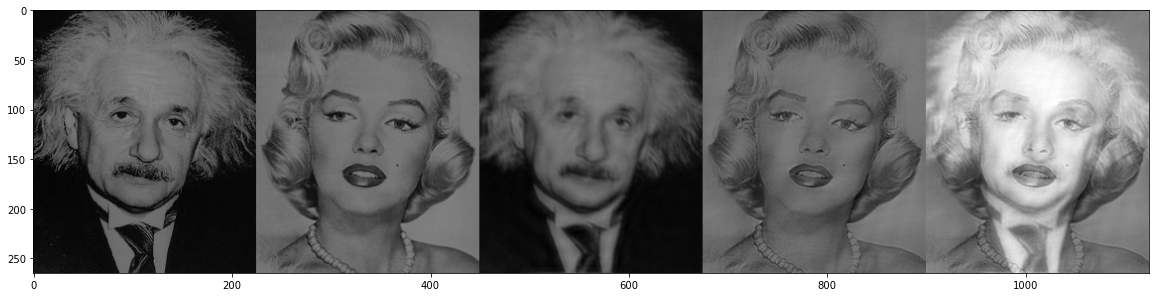

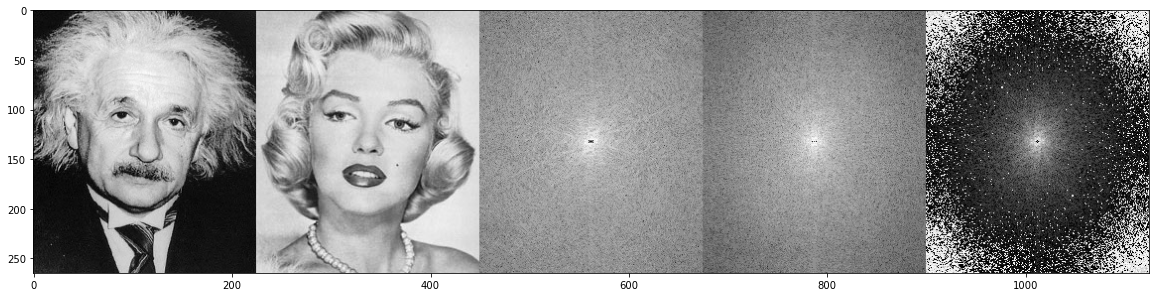

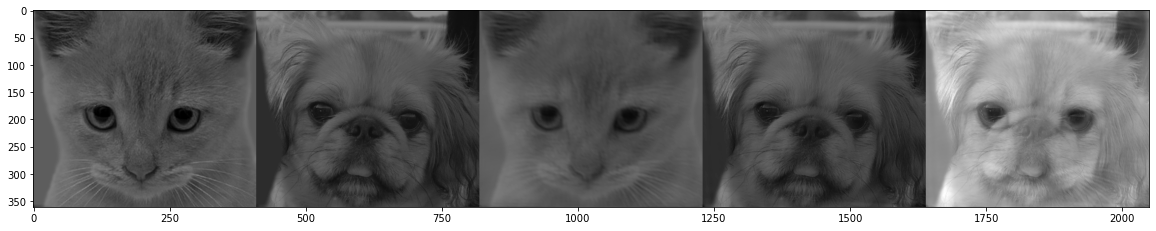

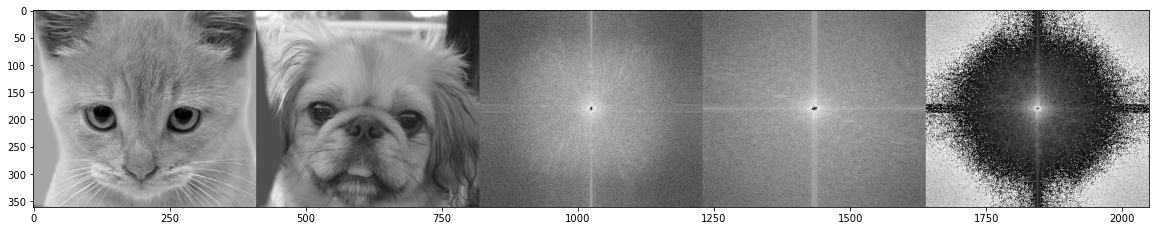

In [4]:
model=Hybrid()
model.Pass(img1,img2)
model.FFT(img1,img2)
model.Pass(img3,img4)
model.FFT(img3,img4)